In [9]:
from pynamical import simulate, save_fig
import os, pandas as pd, numpy as np
import matplotlib.pyplot as plt, matplotlib.cm as cm, matplotlib.font_manager as fm
from mpl_toolkits.mplot3d import Axes3D
from numba import jit

In [10]:
def get_title_font(family='Helvetica', style='normal', size=20, weight='normal', stretch='normal'):

    if family=='Helvetica':
        family = ['Helvetica', 'Arial', 'sans-serif']
    fp = fm.FontProperties(family=family, style=style, size=size, weight=weight, stretch=stretch)
    return fp

def get_label_font(family='Helvetica', style='normal', size=16, weight='normal', stretch='normal'):
    
    if family=='Helvetica':
        family = ['Helvetica', 'Arial', 'sans-serif']
    fp = fm.FontProperties(family=family, style=style, size=size, weight=weight, stretch=stretch)
    return fp

In [11]:
def save_and_show(fig, ax, save, show, filename='image', folder='images', dpi=300, bbox_inches='tight', pad=0.1):
   
    
    if save:  
        save_fig(filename=filename, folder=folder, dpi=dpi, bbox_inches=bbox_inches, pad=pad)
        
    if show:
        plt.show()   
    else:
        return fig, ax

In [12]:
def get_bifurcation_plot_points(pops):
  
    # create a new DataFrame to contain our xy points
    xy_points = pd.DataFrame(columns=['x', 'y'])
    
    # for each column in the populations DataFrame
    for rate in pops.columns:
        # append the growth rate as the x column and all the population values as the y column
        xy_points = xy_points.append(pd.DataFrame({'x':rate, 'y':pops[rate]}))
    
    # reset the index and drop the old index before returning the xy point data
    xy_points = xy_points.reset_index().drop(labels='index', axis=1)
    return xy_points

def bifurcation_plot(pops, xmin=0, xmax=4, ymin=0, ymax=1, figsize=(10,6),
                     title='Diagrama de Bifurcación', xlabel='Grado de Crecimiento', ylabel='Población', 
                     color='B', filename='image', save=True, show=True, title_font=None, label_font=None,
                     folder='images', dpi=300, bbox_inches='tight', pad=0.1):
 
    if title_font is None:
        title_font = get_title_font()
        
    if label_font is None:
        label_font = get_label_font()
    
    # create a new matplotlib figure and axis and set its size
    fig, ax = plt.subplots(figsize=figsize)
    
    # plot the xy data
    points = get_bifurcation_plot_points(pops)
    bifurcation_scatter = ax.scatter(points['x'], points['y'], c=color, edgecolor='None', alpha=1, s=1)
    
    # set x and y limits, title, and x and y labels
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_title(title, fontproperties=get_title_font())
    ax.set_xlabel(xlabel, fontproperties=get_label_font())
    ax.set_ylabel(ylabel, fontproperties=get_label_font())
    
    return save_and_show(fig=fig, ax=ax, save=save, show=show, filename=filename, folder=folder, dpi=dpi, bbox_inches=bbox_inches, pad=pad)

In [14]:
pops = simulate(num_gens=20, rate_min=0.5, rate_max=3.5, num_rates=7)
pops.applymap(lambda x: '{:03.3f}'.format(x))

,0.5,1.0,1.5,2.0,2.5,3.0,3.5
0,0.500,0.500,0.500,0.500,0.500,0.500,0.500
1,0.125,0.250,0.375,0.500,0.625,0.750,0.875
2,0.055,0.188,0.352,0.500,0.586,0.562,0.383
3,0.026,0.152,0.342,0.500,0.607,0.738,0.827
4,0.013,0.129,0.338,0.500,0.597,0.580,0.501
5,0.006,0.112,0.335,0.500,0.602,0.731,0.875
6,0.003,0.100,0.334,0.500,0.599,0.590,0.383
7,0.002,0.090,0.334,0.500,0.600,0.726,0.827
8,0.001,0.082,0.334,0.500,0.600,0.597,0.501
9,0.000,0.075,0.333,0.500,0.600,0.722,0.875


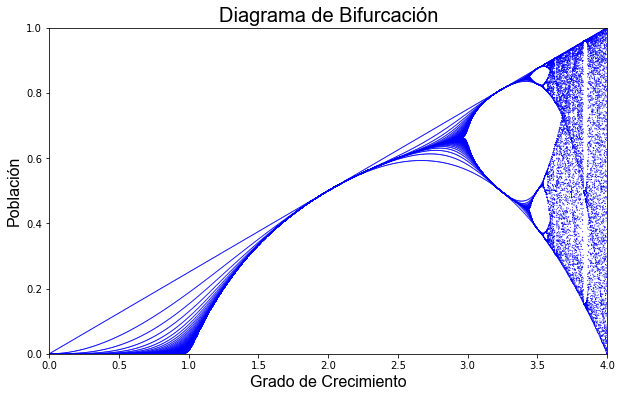

In [15]:
pops = simulate(num_gens=100, rate_min=0, rate_max=4, num_rates=1000, num_discard=1)
bifurcation_plot(pops, filename='logistic-map-bifurcation-0')